## Dataset
#### Allen Institute for Brain Science: Visual Coding - Neuropixels

© 2015 Allen Institute for Brain Science. Allen Brain Atlas API. Available from: https://portal.brain-map.org/explore/circuits/visual-coding-neuropixels).

## Analyze eye-tracking data

##### Imports

In [1]:
# imports
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

##### Set up project 

In [2]:
# set manifest path and load project cache
MANIFEST_PATH = '/micha/visual_encoding/ecephys_cache_dir/'
project_cache = EcephysProjectCache.from_warehouse(manifest=join(MANIFEST_PATH, "manifest.json"))

##### Load data

In [3]:
# Select (and download) data for an example session
SESSION_ID = 791319847
session = project_cache.get_session_data(SESSION_ID)

In [4]:
# get pupil data
pupil_data = session.get_pupil_data()
pupil_data.head()

,corneal_reflection_center_x,corneal_reflection_center_y,corneal_reflection_height,corneal_reflection_width,corneal_reflection_phi,pupil_center_x,pupil_center_y,pupil_height,pupil_width,pupil_phi,eye_center_x,eye_center_y,eye_height,eye_width,eye_phi
Time (s),,,,,,,,,,,,,,,
3.19642,315.195530,216.771737,15.228258,14.753248,0.397140,322.838059,171.519408,68.834830,74.728104,-0.025071,304.432640,194.963707,235.544194,305.849526,0.118263
3.22698,315.134054,216.690086,15.894290,15.167013,0.515818,323.102075,171.144225,70.702580,76.162176,-0.077871,305.060657,194.736008,236.257581,306.791696,0.121840
3.24317,315.590042,216.527324,12.762853,13.429345,-0.390412,322.901180,171.658239,71.215809,75.818714,0.126298,305.337688,194.670752,237.026554,305.804897,0.132001
3.27677,315.504906,217.223332,13.549520,14.536822,-0.609003,322.811477,171.886798,71.393805,74.790444,0.139190,304.919767,195.083706,235.943414,306.054632,0.128629
3.31001,315.269718,217.142424,12.773545,13.920805,-0.659214,322.452163,172.001546,71.153255,75.489056,-0.010470,304.562651,195.236574,236.655648,305.818482,0.134018


In [5]:
# get gaze data
gaze_data = session.get_screen_gaze_data()
gaze_data.head()

,raw_eye_area,raw_pupil_area,raw_screen_coordinates_x_cm,raw_screen_coordinates_y_cm,raw_screen_coordinates_spherical_x_deg,raw_screen_coordinates_spherical_y_deg
Time (s),,,,,,
3.19642,0.058867,0.004563,5.236162,-2.679523,18.966566,-10.129307
3.22698,0.059227,0.004740,5.271450,-2.712756,19.078337,-10.252287
3.24317,0.059229,0.004697,5.191260,-2.645702,18.822196,-10.004051
3.27677,0.059006,0.004571,5.241654,-2.645714,18.991873,-10.004096
3.31001,0.059139,0.004656,5.219199,-2.633003,18.918850,-9.956996


##### Visual eye-tracking data

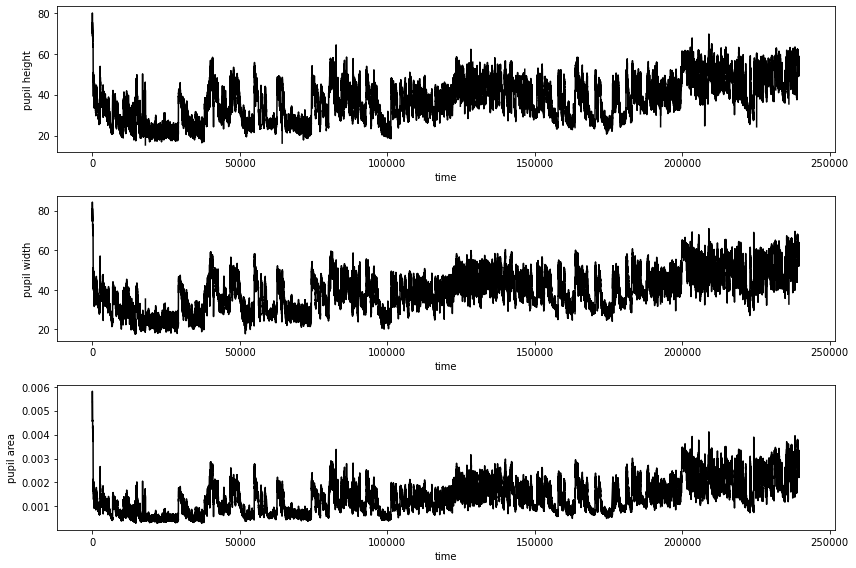

In [6]:
# plot time-course of pupil data

# plot data before phototagging only
phototag_idx = 8000
height = pupil_data.pupil_height[:phototag_idx].values
width = pupil_data.pupil_width[:phototag_idx].values
area = gaze_data.raw_pupil_area[:phototag_idx].values
# create figure
fig, ax = plt.subplots(3,1, figsize=(12,8), tight_layout=True)

# plot
ax[0].plot(height, color='k')
ax[1].plot(width, color='k')
ax[2].plot(area, color='k')

# label
ax[0].set_ylabel('pupil height')
ax[1].set_ylabel('pupil width')
ax[2].set_ylabel('pupil area')
for axes in ax:
    axes.set_xlabel('time');


##### NaN
Some data values are NaN. One option may be to interpolate these values

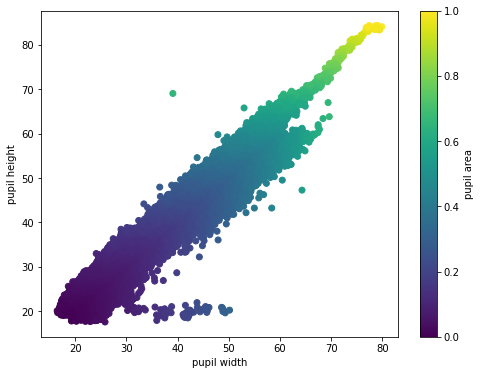

In [7]:
# plot pupil size

# colormap parameters
norm = None
cmap = 'viridis'
cm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

# plot
fig, ax = plt.subplots(figsize=[8,6])
ax.scatter(height, width, c=area, norm=norm, cmap=cmap)

# label
ax.set_xlabel('pupil width')
ax.set_ylabel('pupil height')
fig.colorbar(cm, label='pupil area');